# 07: Using functions to solve an equation-- The Theis example
In this exercise we will implement the Theis equation in Python using functions, to evaluate drawdown in hydraulic head from pumping at a well.


### Background
The Theis (1935) equation is used to calculate drawdown for two-dimensional radial groundwater flow to a point source in an infinite, homogeneous aquifer. The Theis equation was derived from heat transfer literature (with the mathematical help of C.I. Lubin) and is defined as:

\begin{equation}
s = \frac{Q}{4 \pi T} W(u)
\end{equation}

where  
$s$ is drawdown [L],  
$Q$ is the pumping rate [L$^3$/T],  
$T$ is the aquifer transmissivity [L$^2$/T],  
$u$ is a dimensionless time parameter [unitless], and  
$W(u)$ is the Well function (exponential integral $E_1$) [unitless]. The exponential integral is available in ``scipy.special`` as the ``exp1()`` function.

The dimensionless time parameter is defined as:

\begin{equation}
u = \frac{r^2S}{4Tt}
\end{equation}

where  
$r$ is the distance from the pumping well to a point where drawdown is observed [L],   
$S$ is storativity [unitless], and  
$t$ is the time since pumping began. 

Storativity is defined as:

\begin{equation}
S = S_s b
\end{equation}

where  
$S_s$ is specific storage [1/L] and   
$b$ is the thickness of the aquifer.

### imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import exp1 as W

### Step 1)
Make a function for the Theis equation. The function should include a [Numpy-style docstring](https://numpydoc.readthedocs.io/en/latest/format.html) that documents the inputs and what the function returns.

\begin{equation}
s = \frac{Q}{4 \pi T} W(u)
\end{equation}

hints: 
* since this also includes the dimensionless time parameter, the inputs are $r$, $t$, $Q$, $T$, and $S$ 
* we imported $W$ above from ``scipy.special``

In [2]:
def theis(r, t, Q=1.16, T=100, S=0.0001):
    """Use the Theis equation to get drawdown
    in a confined aquifer at a distance r 
    from a well pumping at rate Q, for time t.
    
    Parameters
    ----------
    r : float or array or floats
        Distance to the pumping well (L)
    t : float or list-like of floats
        Times to calculate drawdown at (T)
    Q : float
        Pumping rate (L3/T)
    T : float
        Aquifer transmissivity (L2/T)
    S : float
        Aquifer storativity
        
    Returns
    -------
    s : float array
        Drawdown for all values of r or t
        
    Notes
    -----
    If r is a 1 or 2D array, t must be scalar.
    If t is non-scalar (list-like), r must be scalar.
    
    Examples
    --------
    >>> theis(1000, 10, Q=4088, T=1000, S=3e-4)
    array([1.40636669])
    """
    
    # coerce time input into a numpy array
    # (so that we can use the same code 
    #  for vector or scalar inputs of t)
    if np.isscalar(t):
        t = [t]
    t = np.array(t, dtype=float)
    
    # dimensionless time parameter
    # (only compute for non-zero times)
    u = r**2 * S / (4 * T * t)
    
    s = Q / (4 * np.pi * T) * W(u)
    return s

### Step 2)

Use the eqn. from Step 1) to compute drawdown at a distance of 1,000m, at 10 days, assuming a pumping rate of 4,088 m/day, transmissivity (T) of 1,000 m/day, and a storativity (S) of 3 x 10$^{-4}$

hint: you should get ``1.40636669``

In [3]:
theis(1000, 10, Q=4088, T=1000, S=3e-4)

array([1.40636669])

### Step 3)
Make a plot of drawdown over time for the same parameters as in Step 2)

Text(0.5, 0, 'Time, in days')

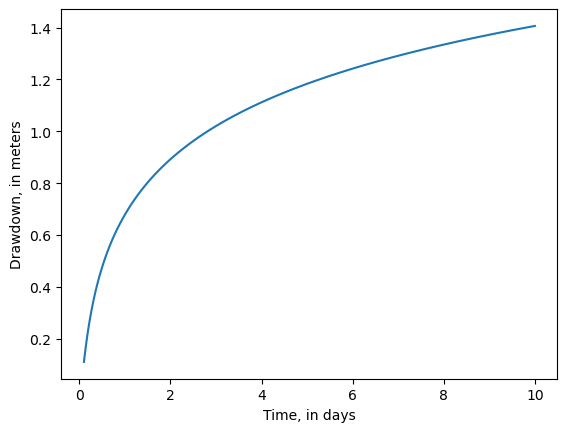

In [4]:
times = np.logspace(-1, 1, 100)
s = theis(1000, times, Q=4088, T=1000, S=3e-4)

plt.plot(times, s)
plt.ylabel('Drawdown, in meters')
plt.xlabel('Time, in days')

### Step 4)


Make a new function that accepts arrays of $x$ and $y$ locations, and a pumping well location ($x$, $y$), and returns a corresponding array of $s$ (drawdown) locations, for any number of times. This new function should call the function created in Step 1). To do this, you will need an additional function to compute the distance to the pumping well $r$ for any $x$, $y$ location.


In [5]:
def get_distance(x0, y0, x1, y1):
    """Compute the distance between two points.
    
    Parameters
    ----------
    x0 : float or array-like
        x-coordinate(s) for computing distance
    y0 : float or array-like
        y-coordinate(s) for computing distance
    x1 : float
        x-coordinate to compute distance from
    y1 : float
        y-coordinate to compute distance from
        
    Returns
    -------
    distance : float or array
        Distance of each point defined by x0, y0 from
        x1, y1.
    """
    return np.sqrt((x1-x0)**2 + (y1-y0)**2)


def theis_xy(x, y, pumping_well_xy, t, Q=1.16, T=100, S=0.0001):
    """Use the Theis equation to get drawdown
    in a confined aquifer at any x, y point(s),
    for a pumping well at (x, y) location pumping_well_xy,
    pumping at rate Q, for time t.
    
    Parameters
    ----------
    x : float or list-like of floats
        x-coordinates for computing drawdown.
    y : float or list-like of floats
        y-coordinates for computing drawdown.
    pumping_well_xy : tuple
        (x, y) location of the pumping well
    t : float or list-like of floats
        Times to calculate drawdown at (T)
    Q : float
        Pumping rate (L3/T)
    T : float
        Aquifer transmissivity (L2/T)
    S : float
        Aquifer storativity
        
    Returns
    -------
    s : list of arrays
        Arrays of drawdown (of same shape as x and y),
        at each time in t.
    """
    if np.isscalar(t):
        t = [t]
    if np.isscalar(x):
        x = [x]
    if np.isscalar(y):
        y = [y]
    x = np.array(x)
    y = np.array(y)
    
    s = []
    for ts in t:
        s_t = []
        r = get_distance(x, y, *pumping_well_xy)
        s_xy = theis(r, t, Q=Q, T=T, S=S)
        s_t.append(s_xy)
        s_t = np.reshape(s_t, np.shape(x))
        s.append(s_t)
    return s

### Step 5)

Use the function from Step 4) to make a 2D plot of drawdown at 10 days, on a 2,000 x 2,000 meter grid (with an origin of 0, 0), with the pumping well located at 1000, 1000.

hint: if the function is taking too long to run, try calling function from step 1) with *vectors* of x,y instead of *scalars*. It should run in less than a second.

In [6]:
%%time
x, y = np.meshgrid(np.arange(2000), np.arange(2000))
pumping_well_xy = (1000, 1000)

s = theis_xy(x, y, pumping_well_xy, 10, Q=4088, T=1000, S=3e-4)

CPU times: user 135 ms, sys: 35.8 ms, total: 171 ms
Wall time: 171 ms


In [7]:
theis_xy(1000, 0, (1000, 1000), 10, Q=4088, T=1000, S=3e-4)

[array([1.40636669])]

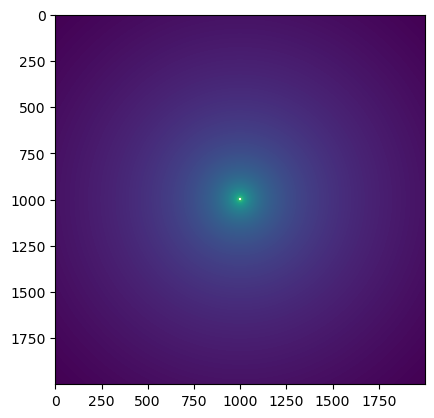

In [8]:
plt.imshow(s[0])

### Step 6)
With $s$ returned as an array for a given set of x, y locations, we can now use *superposition* (adding drawdowns together) to evalute the effects of multiple pumping wells. Try calling the function from Step 4) again with a well at 500, 500. The $s$ output can be added to the results from Step 5) to get a composite map of drawdown with the two wells pumping.

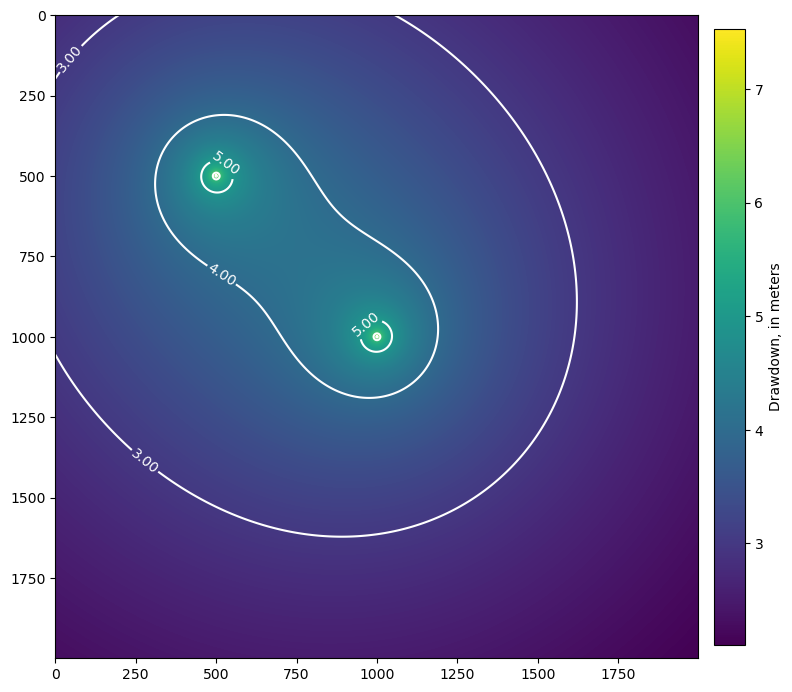

In [9]:
s1 = theis_xy(x, y, (1000, 1000), 10, Q=4088, T=1000, S=3e-4)
s2 = theis_xy(x, y, (500, 500), 10, Q=4088, T=1000, S=3e-4)

s_total = s1[0] + s2[0]
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(s_total)
cs = ax.contour(s_total, colors='w', levels=np.arange(0, 10))
ax.clabel(cs, inline=True, fmt='%.2f', fontsize=10)
fig.colorbar(im, label='Drawdown, in meters', shrink=0.8, pad=0.02)